In [338]:
import qiskit as qk
import tensorflow as tf
import random
from math import pi
from qiskit import(QuantumCircuit,execute,Aer,IBMQ)
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

In [339]:
#Build noise model from backend properties
IBMQ.save_account('0fbdb382eb11ab0fe752ceccce6e05056adafba8b5b0036998ee49a6ff117d799049d633f04529d2c8692710bfd02974e2fa9c3981b9357ccb166452de5b0211')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_vigo')
noise_model = NoiseModel.from_backend(backend)

configrc.store_credentials:WARNING:2020-09-22 16:29:24,766: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-09-22 16:29:26,176: Credentials are already in use. The existing account in the session will be replaced.


In [340]:
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

In [341]:
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [342]:
#Creating qubits
q=qk.QuantumRegister(2)

In [343]:
#Creating Classical Bits

c=qk.ClassicalRegister(2)
circuit=qk.QuantumCircuit(q,c)

In [344]:
#Hadamard Gate on first and second qubit (Outputs both possible states 0 and 1)
#To get all possible input combinations |00>,|01>,|10>,|11>

#circuit.h(q[0])
#circuit.h(q[1])

In [345]:
#Rotation Operation Ry along y-axis on first qubit 
#Add training model here for theta
theta=random.vonmisesvariate(mu=0, kappa=4)
circuit.ry(theta,q[0])

In [346]:
#CNOT Gate on the first to the second qubit (Negates second state only if first state is 1)
circuit.cx(0,1)

In [347]:
#Rotation Operation Rx along x-axis on second qubit 
circuit.rx(pi,q[1])

In [348]:
#Display circuit
circuit.draw()

┌────────────┐               
q230_0: ┤ RY(5.5505) ├──■────────────
        └────────────┘┌─┴─┐┌────────┐
q230_1: ──────────────┤ X ├┤ RX(pi) ├
                      └───┘└────────┘
 c22: 2/═════════════════════════════

In [349]:
simulator = Aer.get_backend('qasm_simulator')

In [350]:
#Map quantum measurement to classical bits
circuit.measure(q,c)

In [351]:
#Checking for 1 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'10': 1}


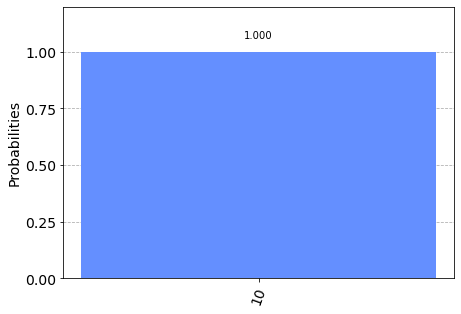

In [352]:
#Histogram of probabilities for 01 and 10 in one measurement
plot_histogram(counts)

In [353]:
#Checking for 10 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 3, '10': 7}


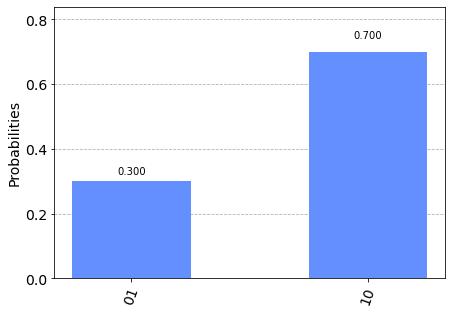

In [354]:
#Histogram of probabilities for 01 and 10 in ten measurements
plot_histogram(counts)

In [355]:
#Checking for 100 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 5, '01': 14, '10': 80, '11': 1}


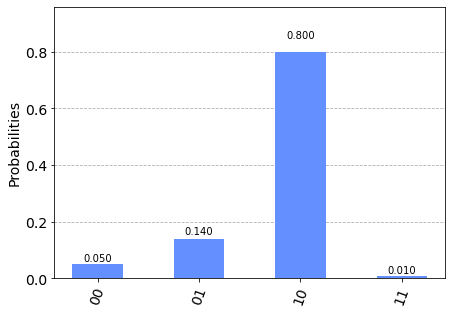

In [356]:
#Histogram of probabilities for 01 and 10 in hundred measurements
plot_histogram(counts)

In [357]:
#Checking for 1000 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000, noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 46, '01': 125, '10': 822, '11': 7}


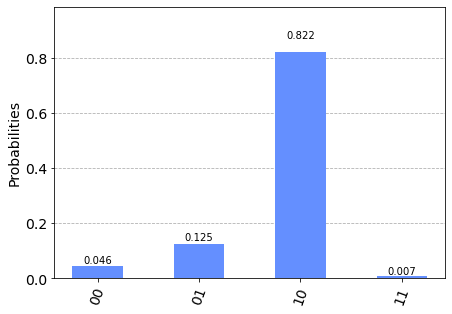

In [358]:
#Histogram of probabilities for 01 and 10 in thousand measurements
plot_histogram(counts)